In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
class NavalWarfare:
    def __init__(self,field_size=10):
        state = np.zeros((field_size+2,field_size+2))
        ships = [1] * 4 + [2] * 3 + [3] * 2 + [4]
        N = field_size
        self.actions = np.array(range(N**2))
        for ship in ships:
#             print(ship)
#             print(state.shape)
            isNotReady = True       
            while isNotReady:
                x = np.random.randint(1,field_size+1)
                y = np.random.randint(1,field_size+1)
                orientation = np.random.randint(2)
                isNotReady = False
                for i in range(ship):
                    if (state[x,y] != 1 
                    and state[x-1, y] != 1 and state[x+1, y] != 1
                    and state[x, y-1] != 1 and state[x, y+1] != 1
                    and state[x-1, y-1] != 1 and state[x+1, y+1] != 1
                    and state[x+1, y-1] != 1 and state[x-1, y+1] != 1
                    and x in range(1,field_size+1) and y in range(1,field_size+1)):
                        state[x,y] = -1
                        if orientation == 0:
                            x -= 1
                        else:
                            y -= 1
                    else:
                        isNotReady = True
                        state = np.maximum(state,0)
                        break
                state = np.abs(state)
            
            self.state = state[1:-1,1:-1]
            self.observable = np.zeros_like(self.state)
            self.N = N

            
    def set_state(self, state_matix):
        self.state = state_matix
        
    def move(self,action):
            x = action % self.N
            y = action // self.N
            x,y = y,x # test
#             print(x,y)
            end_game = False
            repeat_turn = False
            reward = 0
            if self.state[x,y] == 1:
                self.state[x,y] = -1
                self.observable[x,y] = -10
                if np.max(self.state) == 0:
                    end_game = True
                    reward = 100
                else:
                    reward = 10
                    repeat_turn = True
            elif self.state[x,y] == -1:
                self.state[x,y] = -1
                self.observable[x,y] = -10
            else:
                self.observable[x,y] = -20
            
            return reward, end_game, repeat_turn, self.observable
            
        

In [91]:
a = np.array([1,2,3])
a.shape

(3,)

In [92]:
np.zeros((*a.shape,3)).shape

(3, 3)

In [66]:
field = NavalWarfare(10)

In [67]:
field.state

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [68]:
field.observable

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [69]:
field.state

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [70]:
reward,repeat,observe,state = field.move(32)

In [71]:
state

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [72]:
reward,repeat,observe

(0, False, False)

In [73]:
reward,repeat,observe,state = field.move(22)
reward,repeat,observe

(10, False, True)

In [74]:
state

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [75]:
print(field.state)

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  1.  0.  1.  1.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [76]:
field.state *= 0
field.state[6,5] = 1
reward,repeat,observe,state = field.move(56)

In [77]:
field.state

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [78]:
reward,repeat,observe,state

(0,
 False,
 False,
 array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., -20.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]))

In [79]:
state

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., -20.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [18]:
model = Sequential()
model.add(InputLayer(batch_input_shape=(1, 100)))
model.add(Dense(20, activation='relu'))
model.add(Dense(100, activation='linear'))
# model.add(Maximum(shape=(100)))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 20)                   2020      
_________________________________________________________________
dense_1 (Dense)              (1, 100)                  2100      
Total params: 4,120
Trainable params: 4,120
Non-trainable params: 0
_________________________________________________________________


In [20]:
state.flatten().shape

(100,)

In [21]:
field.observable.shape

(10, 10)

In [22]:
!pip install tqdm

In [23]:
from tqdm import tqdm

In [94]:
discount_factor = 0.95
eps0 = 0.05
eps_decay_factor = 0.999
num_episodes=500
start_epochs = 50

In [24]:
for i in tqdm(range(num_episodes)):
    field = NavalWarfare(10)
    N = field.N
    actions = field.actions
    state = field.observable
    eps *= eps_decay_factor
    end_game = False
    turns = 0
    while not end_game:
        turns += 1
        if np.random.random() < eps:
            action = np.random.choice(actions)
        else:
            action = np.argmax(
              model.predict(state.flatten().reshape(1,-1)))
        r,end_game,repeat,new_state = field.move(action)
        reward = r - 1
        target = (reward + 
          discount_factor * 
            np.max(
              model.predict(state.flatten().reshape(1,-1))))
        target_vector = model.predict(
         state.flatten().reshape(1,-1))[0]
        target_vector[action] = target
        model.fit(
          state.flatten().reshape(1,-1), 
          target_vector.reshape(1,-1), 
          epochs=1, verbose=0)
        state = new_state
    print(turns)

NameError: name 'num_episodes' is not defined

In [10]:
from keras.optimizers import Adam


In [11]:
model.optimizer.lr

NameError: name 'model' is not defined

In [12]:
discount_factor = 0.95
eps0 = 0.05
eps_decay_factor = 0.999
num_episodes=500
start_epochs = 1

In [81]:
from keras.optimizers import Adam

model = Sequential()
model.add(Reshape((10,10,1),input_shape=(1,100)))
kern_shape = (5,5)
model.add(Conv2D(filters=1,kernel_size =kern_shape,strides=(1,1), padding='same', activation='linear', input_shape=(10, 10, 1)))
model.add(Flatten())
opt = Adam(learning_rate=0.1)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])

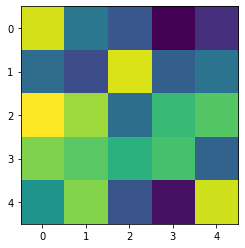

In [82]:
w = np.array(model.weights[0]).reshape(5,5)
import matplotlib.pyplot as plt
plt.imshow(w)

In [180]:
w

array([[-0.05340853,  0.18611598, -0.30221123,  0.12373981,  0.17455924],
       [ 0.20186198,  0.31832296, -0.31381047,  0.17045778,  0.08089626],
       [ 0.03843743,  0.18964821, -0.14625518, -0.15524484, -0.08008838],
       [ 0.02806818,  0.06251797, -0.02727067, -0.04763225, -0.1001512 ],
       [ 0.01459789, -0.290964  , -0.07508701, -0.32308558, -0.33485803]],
      dtype=float32)

In [83]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 10, 10, 1)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 1)         26        
_________________________________________________________________
flatten_10 (Flatten)         (None, 100)               0         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [84]:
def model2():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(1, 100)))
    model.add(Dense(20, activation='linear'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(100, activation='linear'))
    # model.add(Maximum(shape=(100)))
    opt = Adam(learning_rate=0.1)
    model.compile(loss='mse', optimizer=opt, metrics=['mse'])
    return model
model = model2()

In [85]:
def model_conv():
    model = Sequential()
    model.add(Reshape((10,10,1),input_shape=(1,100)))
    kern_shape = (5,5)
    model.add(Conv2D(filters=1,kernel_size =kern_shape,strides=(1,1), padding='same', activation='linear', input_shape=(10, 10, 1)))
    model.add(Conv2D(filters=1,kernel_size =kern_shape,strides=(1,1), padding='same', activation='sigmoid', input_shape=(10, 10, 1)))
    model.add(Conv2D(filters=1,kernel_size =kern_shape,strides=(1,1), padding='same', activation='linear', input_shape=(10, 10, 1)))
    model.add(Flatten())
    opt = Adam(learning_rate=0.1)
    model.compile(loss='mse', optimizer=opt, metrics=['mse'])
    return model
model = model_conv()

In [86]:
eps0 = 0.5
eps_decay_factor = 0.99
num_episodes=500
start_epochs = 10

In [87]:
for i in tqdm(range(num_episodes)):
    field = NavalWarfare(10)
    N = field.N
    actions = field.actions
    state = field.observable
    if i < start_epochs:
        eps = 1
    elif i == start_epochs:
        print('pretraining finished')
        eps = eps0
    eps *= eps_decay_factor
    end_game = False
    turns = 0
    target_batch = []
    states_batch = []
    while not end_game and turns < 500:
        turns += 1
        if turns % 100 == 0:
            S = (np.sum(field.state) + 20 ) // 2
            sunken = 20 - S
            tested_fields = np.sum(state < 0)
#             print(np.sum(field.state))
#             print(np.sum(state))
            print(f'sunken ships: {sunken}')
            print(f'ships left: {S}')
            print(f'fields tested: {tested_fields}')
        Q = model.predict(state.flatten().reshape(1,-1))
        if np.random.random() < eps:
            action = np.random.choice(actions)
        else:
            action = np.argmax(
                Q
              )
        r,end_game,repeat,new_state = field.move(action)
        reward = r - 5
        Q_new = model.predict(new_state.flatten().reshape(1,-1))
        q = Q[0,action]
#         print(Q.shape,type(q),q.shape)
        target = (reward + 
          discount_factor * 
            (q - np.max(
              Q_new
                 )))
        target_vector = Q[0]
        target_vector[action] = target
        target_batch.append(target_vector.reshape(1,-1))
        states_batch.append(state.flatten().reshape(1,-1))
        state = new_state
        model.fit(state.flatten().reshape(1,1,-1),target_vector.reshape(1,1,-1),epochs=1, verbose=0)
#     states_batch = np.array(states_batch).reshape(turns,-1)
#     target_batch = np.array(target_batch).reshape(turns,-1)
#     print(states_batch.shape)
#     model.fit(
#           states_batch,  
#           target_batch, 
#           epochs=1, verbose=0)
        
    print(turns)

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

sunken ships: 15.0
ships left: 5.0
fields tested: 57
sunken ships: 16.0
ships left: 4.0
fields tested: 87
sunken ships: 18.0
ships left: 2.0
fields tested: 94


  0%|▏                                                                               | 1/500 [00:48<6:40:20, 48.14s/it]

382
sunken ships: 11.0
ships left: 9.0
fields tested: 60
sunken ships: 15.0
ships left: 5.0
fields tested: 87
sunken ships: 17.0
ships left: 3.0
fields tested: 95


  0%|▎                                                                               | 2/500 [01:37<6:41:35, 48.39s/it]

399
sunken ships: 12.0
ships left: 8.0
fields tested: 63
sunken ships: 17.0
ships left: 3.0
fields tested: 83
sunken ships: 19.0
ships left: 1.0
fields tested: 92


  1%|▍                                                                               | 3/500 [02:23<6:35:53, 47.79s/it]

377
sunken ships: 12.0
ships left: 8.0
fields tested: 61
sunken ships: 18.0
ships left: 2.0
fields tested: 90


  1%|▋                                                                               | 4/500 [02:58<6:03:31, 43.97s/it]

284
sunken ships: 12.0
ships left: 8.0
fields tested: 65
sunken ships: 17.0
ships left: 3.0
fields tested: 84
sunken ships: 18.0
ships left: 2.0
fields tested: 93
sunken ships: 19.0
ships left: 1.0
fields tested: 97
sunken ships: 19.0
ships left: 1.0
fields tested: 97


  1%|▊                                                                               | 5/500 [04:00<6:46:34, 49.28s/it]

500
sunken ships: 7.0
ships left: 13.0
fields tested: 63
sunken ships: 15.0
ships left: 5.0
fields tested: 85
sunken ships: 19.0
ships left: 1.0
fields tested: 92
sunken ships: 19.0
ships left: 1.0
fields tested: 97


  1%|▉                                                                               | 6/500 [05:02<7:16:43, 53.04s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 99
500
sunken ships: 15.0
ships left: 5.0
fields tested: 66
sunken ships: 18.0
ships left: 2.0
fields tested: 87


  1%|█                                                                               | 7/500 [05:37<6:32:26, 47.76s/it]

287
sunken ships: 10.0
ships left: 10.0
fields tested: 57
sunken ships: 16.0
ships left: 4.0
fields tested: 85


  2%|█▎                                                                              | 8/500 [06:10<5:56:23, 43.46s/it]

270
sunken ships: 11.0
ships left: 9.0
fields tested: 61
sunken ships: 15.0
ships left: 5.0
fields tested: 85
sunken ships: 19.0
ships left: 1.0
fields tested: 97
sunken ships: 19.0
ships left: 1.0
fields tested: 98


  2%|█▍                                                                              | 9/500 [07:12<6:39:58, 48.88s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 99
500
sunken ships: 10.0
ships left: 10.0
fields tested: 63
sunken ships: 16.0
ships left: 4.0
fields tested: 85
sunken ships: 18.0
ships left: 2.0
fields tested: 94


  2%|█▌                                                                             | 10/500 [07:54<6:22:27, 46.83s/it]

340
pretraining finished
sunken ships: 9.0
ships left: 11.0
fields tested: 45
sunken ships: 15.0
ships left: 5.0
fields tested: 74
sunken ships: 17.0
ships left: 3.0
fields tested: 84
sunken ships: 19.0
ships left: 1.0
fields tested: 91


  2%|█▋                                                                             | 11/500 [08:56<6:57:46, 51.26s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 98
500
sunken ships: 11.0
ships left: 9.0
fields tested: 49
sunken ships: 14.0
ships left: 6.0
fields tested: 70
sunken ships: 17.0
ships left: 3.0
fields tested: 85
sunken ships: 18.0
ships left: 2.0
fields tested: 92


  2%|█▉                                                                             | 12/500 [09:57<7:22:21, 54.39s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 96
500
sunken ships: 10.0
ships left: 10.0
fields tested: 47
sunken ships: 13.0
ships left: 7.0
fields tested: 72
sunken ships: 15.0
ships left: 5.0
fields tested: 79
sunken ships: 17.0
ships left: 3.0
fields tested: 91


  3%|██                                                                             | 13/500 [10:58<7:35:46, 56.15s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 93
500
sunken ships: 10.0
ships left: 10.0
fields tested: 40
sunken ships: 15.0
ships left: 5.0
fields tested: 59
sunken ships: 16.0
ships left: 4.0
fields tested: 76
sunken ships: 19.0
ships left: 1.0
fields tested: 86


  3%|██▏                                                                            | 14/500 [11:56<7:41:19, 56.95s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 92
500
sunken ships: 10.0
ships left: 10.0
fields tested: 38
sunken ships: 17.0
ships left: 3.0
fields tested: 64
sunken ships: 17.0
ships left: 3.0
fields tested: 77
sunken ships: 19.0
ships left: 1.0
fields tested: 88


  3%|██▎                                                                            | 15/500 [12:49<7:29:10, 55.57s/it]

446
sunken ships: 9.0
ships left: 11.0
fields tested: 38
sunken ships: 13.0
ships left: 7.0
fields tested: 62
sunken ships: 19.0
ships left: 1.0
fields tested: 80
sunken ships: 19.0
ships left: 1.0
fields tested: 85


  3%|██▌                                                                            | 16/500 [13:45<7:30:05, 55.80s/it]

482
sunken ships: 10.0
ships left: 10.0
fields tested: 44
sunken ships: 14.0
ships left: 6.0
fields tested: 67
sunken ships: 16.0
ships left: 4.0
fields tested: 78
sunken ships: 17.0
ships left: 3.0
fields tested: 85


  3%|██▋                                                                            | 17/500 [14:44<7:36:33, 56.71s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 90
500
sunken ships: 8.0
ships left: 12.0
fields tested: 43
sunken ships: 11.0
ships left: 9.0
fields tested: 69
sunken ships: 14.0
ships left: 6.0
fields tested: 81
sunken ships: 17.0
ships left: 3.0
fields tested: 88


  4%|██▊                                                                            | 18/500 [15:43<7:40:26, 57.32s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 93
500
sunken ships: 11.0
ships left: 9.0
fields tested: 42
sunken ships: 15.0
ships left: 5.0
fields tested: 63
sunken ships: 16.0
ships left: 4.0
fields tested: 74
sunken ships: 17.0
ships left: 3.0
fields tested: 85


  4%|███                                                                            | 19/500 [16:41<7:43:00, 57.76s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 91
500
sunken ships: 8.0
ships left: 12.0
fields tested: 32
sunken ships: 11.0
ships left: 9.0
fields tested: 59
sunken ships: 13.0
ships left: 7.0
fields tested: 76
sunken ships: 17.0
ships left: 3.0
fields tested: 86


  4%|███▏                                                                           | 20/500 [17:40<7:44:17, 58.04s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 92
500
sunken ships: 8.0
ships left: 12.0
fields tested: 42
sunken ships: 15.0
ships left: 5.0
fields tested: 70
sunken ships: 16.0
ships left: 4.0
fields tested: 85
sunken ships: 16.0
ships left: 4.0
fields tested: 88


  4%|███▎                                                                           | 21/500 [18:39<7:44:34, 58.19s/it]

sunken ships: 16.0
ships left: 4.0
fields tested: 90
500
sunken ships: 9.0
ships left: 11.0
fields tested: 37
sunken ships: 14.0
ships left: 6.0
fields tested: 66
sunken ships: 16.0
ships left: 4.0
fields tested: 76
sunken ships: 17.0
ships left: 3.0
fields tested: 84


  4%|███▍                                                                           | 22/500 [19:37<7:44:29, 58.30s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 90
500
sunken ships: 7.0
ships left: 13.0
fields tested: 37
sunken ships: 14.0
ships left: 6.0
fields tested: 58
sunken ships: 16.0
ships left: 4.0
fields tested: 72
sunken ships: 16.0
ships left: 4.0
fields tested: 81


  5%|███▋                                                                           | 23/500 [20:36<7:44:55, 58.48s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 86
500
sunken ships: 12.0
ships left: 8.0
fields tested: 50
sunken ships: 13.0
ships left: 7.0
fields tested: 64
sunken ships: 15.0
ships left: 5.0
fields tested: 76
sunken ships: 17.0
ships left: 3.0
fields tested: 82


  5%|███▊                                                                           | 24/500 [21:35<7:44:01, 58.49s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 86
500
sunken ships: 7.0
ships left: 13.0
fields tested: 39
sunken ships: 13.0
ships left: 7.0
fields tested: 65
sunken ships: 15.0
ships left: 5.0
fields tested: 77
sunken ships: 17.0
ships left: 3.0
fields tested: 85


  5%|███▉                                                                           | 25/500 [22:33<7:43:46, 58.58s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 90
500
sunken ships: 10.0
ships left: 10.0
fields tested: 41
sunken ships: 13.0
ships left: 7.0
fields tested: 63
sunken ships: 15.0
ships left: 5.0
fields tested: 78
sunken ships: 18.0
ships left: 2.0
fields tested: 87


  5%|████                                                                           | 26/500 [23:32<7:43:02, 58.61s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 89
500
sunken ships: 5.0
ships left: 15.0
fields tested: 41
sunken ships: 14.0
ships left: 6.0
fields tested: 69
sunken ships: 16.0
ships left: 4.0
fields tested: 82
sunken ships: 18.0
ships left: 2.0
fields tested: 89


  5%|████▎                                                                          | 27/500 [24:31<7:41:41, 58.57s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 89
500
sunken ships: 6.0
ships left: 14.0
fields tested: 31
sunken ships: 6.0
ships left: 14.0
fields tested: 51
sunken ships: 10.0
ships left: 10.0
fields tested: 65
sunken ships: 12.0
ships left: 8.0
fields tested: 77


  6%|████▍                                                                          | 28/500 [25:29<7:41:31, 58.67s/it]

sunken ships: 14.0
ships left: 6.0
fields tested: 83
500
sunken ships: 8.0
ships left: 12.0
fields tested: 33
sunken ships: 12.0
ships left: 8.0
fields tested: 56
sunken ships: 16.0
ships left: 4.0
fields tested: 73
sunken ships: 17.0
ships left: 3.0
fields tested: 86


  6%|████▌                                                                          | 29/500 [26:28<7:40:44, 58.69s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 89
500
sunken ships: 11.0
ships left: 9.0
fields tested: 37
sunken ships: 13.0
ships left: 7.0
fields tested: 59
sunken ships: 14.0
ships left: 6.0
fields tested: 71
sunken ships: 15.0
ships left: 5.0
fields tested: 78


  6%|████▋                                                                          | 30/500 [27:27<7:40:00, 58.72s/it]

sunken ships: 16.0
ships left: 4.0
fields tested: 89
500
sunken ships: 6.0
ships left: 14.0
fields tested: 36
sunken ships: 11.0
ships left: 9.0
fields tested: 62
sunken ships: 15.0
ships left: 5.0
fields tested: 76
sunken ships: 15.0
ships left: 5.0
fields tested: 80


  6%|████▉                                                                          | 31/500 [28:26<7:39:06, 58.73s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 88
500
sunken ships: 5.0
ships left: 15.0
fields tested: 41
sunken ships: 10.0
ships left: 10.0
fields tested: 61
sunken ships: 14.0
ships left: 6.0
fields tested: 76
sunken ships: 15.0
ships left: 5.0
fields tested: 82


  6%|█████                                                                          | 32/500 [29:25<7:38:08, 58.74s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 89
500
sunken ships: 8.0
ships left: 12.0
fields tested: 37
sunken ships: 12.0
ships left: 8.0
fields tested: 62
sunken ships: 17.0
ships left: 3.0
fields tested: 79
sunken ships: 18.0
ships left: 2.0
fields tested: 87


  7%|█████▏                                                                         | 33/500 [30:23<7:36:37, 58.67s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 88
500
sunken ships: 10.0
ships left: 10.0
fields tested: 40
sunken ships: 13.0
ships left: 7.0
fields tested: 55
sunken ships: 15.0
ships left: 5.0
fields tested: 72
sunken ships: 17.0
ships left: 3.0
fields tested: 83


  7%|█████▎                                                                         | 34/500 [31:22<7:35:54, 58.70s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 88
500
sunken ships: 9.0
ships left: 11.0
fields tested: 44
sunken ships: 13.0
ships left: 7.0
fields tested: 67
sunken ships: 14.0
ships left: 6.0
fields tested: 79
sunken ships: 15.0
ships left: 5.0
fields tested: 82


  7%|█████▌                                                                         | 35/500 [32:21<7:35:06, 58.72s/it]

sunken ships: 16.0
ships left: 4.0
fields tested: 88
500
sunken ships: 11.0
ships left: 9.0
fields tested: 39
sunken ships: 12.0
ships left: 8.0
fields tested: 58
sunken ships: 16.0
ships left: 4.0
fields tested: 75
sunken ships: 16.0
ships left: 4.0
fields tested: 80


  7%|█████▋                                                                         | 36/500 [33:19<7:33:32, 58.65s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 86
500
sunken ships: 8.0
ships left: 12.0
fields tested: 39
sunken ships: 12.0
ships left: 8.0
fields tested: 67
sunken ships: 16.0
ships left: 4.0
fields tested: 79
sunken ships: 17.0
ships left: 3.0
fields tested: 85


  7%|█████▊                                                                         | 37/500 [34:18<7:32:52, 58.69s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 89
500
sunken ships: 3.0
ships left: 17.0
fields tested: 32
sunken ships: 6.0
ships left: 14.0
fields tested: 51
sunken ships: 10.0
ships left: 10.0
fields tested: 67
sunken ships: 14.0
ships left: 6.0
fields tested: 77


  8%|██████                                                                         | 38/500 [35:17<7:31:57, 58.70s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 84
500
sunken ships: 6.0
ships left: 14.0
fields tested: 40
sunken ships: 13.0
ships left: 7.0
fields tested: 57
sunken ships: 16.0
ships left: 4.0
fields tested: 74
sunken ships: 17.0
ships left: 3.0
fields tested: 81


  8%|██████▏                                                                        | 39/500 [36:15<7:31:08, 58.72s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 87
500
sunken ships: 8.0
ships left: 12.0
fields tested: 36
sunken ships: 14.0
ships left: 6.0
fields tested: 60
sunken ships: 17.0
ships left: 3.0
fields tested: 76
sunken ships: 18.0
ships left: 2.0
fields tested: 83


  8%|██████▎                                                                        | 40/500 [37:14<7:29:27, 58.62s/it]

sunken ships: 19.0
ships left: 1.0
fields tested: 91
500
sunken ships: 8.0
ships left: 12.0
fields tested: 34
sunken ships: 9.0
ships left: 11.0
fields tested: 54
sunken ships: 15.0
ships left: 5.0
fields tested: 71
sunken ships: 17.0
ships left: 3.0
fields tested: 79


  8%|██████▍                                                                        | 41/500 [38:12<7:28:33, 58.63s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 84
500
sunken ships: 7.0
ships left: 13.0
fields tested: 31
sunken ships: 9.0
ships left: 11.0
fields tested: 52
sunken ships: 13.0
ships left: 7.0
fields tested: 69
sunken ships: 15.0
ships left: 5.0
fields tested: 83


  8%|██████▋                                                                        | 42/500 [39:11<7:27:21, 58.61s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 90
500
sunken ships: 7.0
ships left: 13.0
fields tested: 35
sunken ships: 10.0
ships left: 10.0
fields tested: 56
sunken ships: 13.0
ships left: 7.0
fields tested: 65
sunken ships: 14.0
ships left: 6.0
fields tested: 75


  9%|██████▊                                                                        | 43/500 [40:09<7:26:03, 58.56s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 84
500
sunken ships: 6.0
ships left: 14.0
fields tested: 29
sunken ships: 11.0
ships left: 9.0
fields tested: 49
sunken ships: 11.0
ships left: 9.0
fields tested: 63
sunken ships: 14.0
ships left: 6.0
fields tested: 74


  9%|██████▉                                                                        | 44/500 [41:08<7:25:05, 58.57s/it]

sunken ships: 16.0
ships left: 4.0
fields tested: 82
500
sunken ships: 8.0
ships left: 12.0
fields tested: 38
sunken ships: 11.0
ships left: 9.0
fields tested: 59
sunken ships: 14.0
ships left: 6.0
fields tested: 70
sunken ships: 17.0
ships left: 3.0
fields tested: 83


  9%|███████                                                                        | 45/500 [42:07<7:24:49, 58.66s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 88
500
sunken ships: 10.0
ships left: 10.0
fields tested: 38
sunken ships: 14.0
ships left: 6.0
fields tested: 60
sunken ships: 17.0
ships left: 3.0
fields tested: 73
sunken ships: 18.0
ships left: 2.0
fields tested: 81


  9%|███████▎                                                                       | 46/500 [43:05<7:23:24, 58.60s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 85
500
sunken ships: 4.0
ships left: 16.0
fields tested: 29
sunken ships: 11.0
ships left: 9.0
fields tested: 51
sunken ships: 13.0
ships left: 7.0
fields tested: 63
sunken ships: 15.0
ships left: 5.0
fields tested: 75


  9%|███████▍                                                                       | 47/500 [44:04<7:22:51, 58.66s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 80
500
sunken ships: 7.0
ships left: 13.0
fields tested: 31
sunken ships: 13.0
ships left: 7.0
fields tested: 55
sunken ships: 15.0
ships left: 5.0
fields tested: 65
sunken ships: 15.0
ships left: 5.0
fields tested: 74


 10%|███████▌                                                                       | 48/500 [45:03<7:21:52, 58.66s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 80
500
sunken ships: 5.0
ships left: 15.0
fields tested: 35
sunken ships: 8.0
ships left: 12.0
fields tested: 53
sunken ships: 12.0
ships left: 8.0
fields tested: 66
sunken ships: 14.0
ships left: 6.0
fields tested: 75


 10%|███████▋                                                                       | 49/500 [46:02<7:21:16, 58.71s/it]

sunken ships: 15.0
ships left: 5.0
fields tested: 80
500
sunken ships: 8.0
ships left: 12.0
fields tested: 37
sunken ships: 11.0
ships left: 9.0
fields tested: 54
sunken ships: 14.0
ships left: 6.0
fields tested: 70
sunken ships: 14.0
ships left: 6.0
fields tested: 78


 10%|███████▉                                                                       | 50/500 [47:00<7:20:39, 58.75s/it]

sunken ships: 16.0
ships left: 4.0
fields tested: 84
500
sunken ships: 5.0
ships left: 15.0
fields tested: 27
sunken ships: 7.0
ships left: 13.0
fields tested: 49
sunken ships: 15.0
ships left: 5.0
fields tested: 69
sunken ships: 15.0
ships left: 5.0
fields tested: 75


 10%|████████                                                                       | 51/500 [47:59<7:19:36, 58.74s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 83
500
sunken ships: 7.0
ships left: 13.0
fields tested: 30
sunken ships: 17.0
ships left: 3.0
fields tested: 56
sunken ships: 17.0
ships left: 3.0
fields tested: 69
sunken ships: 19.0
ships left: 1.0
fields tested: 76


 10%|████████▏                                                                      | 52/500 [48:47<6:53:07, 55.33s/it]

405
sunken ships: 7.0
ships left: 13.0
fields tested: 37
sunken ships: 10.0
ships left: 10.0
fields tested: 51
sunken ships: 12.0
ships left: 8.0
fields tested: 66
sunken ships: 16.0
ships left: 4.0
fields tested: 76


 11%|████████▎                                                                      | 53/500 [49:45<6:59:55, 56.37s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 82
500
sunken ships: 8.0
ships left: 12.0
fields tested: 28
sunken ships: 11.0
ships left: 9.0
fields tested: 54
sunken ships: 11.0
ships left: 9.0
fields tested: 66
sunken ships: 12.0
ships left: 8.0
fields tested: 77


 11%|████████▌                                                                      | 54/500 [50:44<7:04:22, 57.09s/it]

sunken ships: 16.0
ships left: 4.0
fields tested: 85
500
sunken ships: 4.0
ships left: 16.0
fields tested: 28
sunken ships: 12.0
ships left: 8.0
fields tested: 53
sunken ships: 14.0
ships left: 6.0
fields tested: 64
sunken ships: 15.0
ships left: 5.0
fields tested: 78


 11%|████████▋                                                                      | 55/500 [51:43<7:06:45, 57.54s/it]

sunken ships: 15.0
ships left: 5.0
fields tested: 83
500
sunken ships: 6.0
ships left: 14.0
fields tested: 31
sunken ships: 8.0
ships left: 12.0
fields tested: 49
sunken ships: 11.0
ships left: 9.0
fields tested: 64
sunken ships: 14.0
ships left: 6.0
fields tested: 72


 11%|████████▊                                                                      | 56/500 [52:41<7:08:23, 57.89s/it]

sunken ships: 16.0
ships left: 4.0
fields tested: 79
500
sunken ships: 9.0
ships left: 11.0
fields tested: 26
sunken ships: 9.0
ships left: 11.0
fields tested: 42
sunken ships: 14.0
ships left: 6.0
fields tested: 62
sunken ships: 15.0
ships left: 5.0
fields tested: 71


 11%|█████████                                                                      | 57/500 [53:40<7:08:17, 58.01s/it]

sunken ships: 15.0
ships left: 5.0
fields tested: 80
500
sunken ships: 8.0
ships left: 12.0
fields tested: 29
sunken ships: 10.0
ships left: 10.0
fields tested: 42
sunken ships: 14.0
ships left: 6.0
fields tested: 60
sunken ships: 16.0
ships left: 4.0
fields tested: 68


 12%|█████████▏                                                                     | 58/500 [54:38<7:08:53, 58.22s/it]

sunken ships: 16.0
ships left: 4.0
fields tested: 82
500
sunken ships: 5.0
ships left: 15.0
fields tested: 27
sunken ships: 9.0
ships left: 11.0
fields tested: 49
sunken ships: 10.0
ships left: 10.0
fields tested: 60
sunken ships: 12.0
ships left: 8.0
fields tested: 70


 12%|█████████▎                                                                     | 59/500 [55:37<7:08:55, 58.36s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 83
500
sunken ships: 7.0
ships left: 13.0
fields tested: 27
sunken ships: 10.0
ships left: 10.0
fields tested: 48
sunken ships: 10.0
ships left: 10.0
fields tested: 60
sunken ships: 13.0
ships left: 7.0
fields tested: 71


 12%|█████████▍                                                                     | 60/500 [56:36<7:08:16, 58.40s/it]

sunken ships: 13.0
ships left: 7.0
fields tested: 75
500
sunken ships: 6.0
ships left: 14.0
fields tested: 36
sunken ships: 11.0
ships left: 9.0
fields tested: 52
sunken ships: 13.0
ships left: 7.0
fields tested: 64
sunken ships: 15.0
ships left: 5.0
fields tested: 74


 12%|█████████▋                                                                     | 61/500 [57:34<7:07:53, 58.48s/it]

sunken ships: 15.0
ships left: 5.0
fields tested: 80
500
sunken ships: 2.0
ships left: 18.0
fields tested: 27
sunken ships: 8.0
ships left: 12.0
fields tested: 44
sunken ships: 12.0
ships left: 8.0
fields tested: 56
sunken ships: 14.0
ships left: 6.0
fields tested: 65


 12%|█████████▊                                                                     | 62/500 [58:33<7:07:20, 58.54s/it]

sunken ships: 14.0
ships left: 6.0
fields tested: 71
500
sunken ships: 4.0
ships left: 16.0
fields tested: 23
sunken ships: 8.0
ships left: 12.0
fields tested: 43
sunken ships: 13.0
ships left: 7.0
fields tested: 59
sunken ships: 15.0
ships left: 5.0
fields tested: 69


 13%|█████████▉                                                                     | 63/500 [59:31<7:06:07, 58.51s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 81
500
sunken ships: 5.0
ships left: 15.0
fields tested: 34
sunken ships: 9.0
ships left: 11.0
fields tested: 51
sunken ships: 13.0
ships left: 7.0
fields tested: 67
sunken ships: 17.0
ships left: 3.0
fields tested: 78


 13%|█████████▊                                                                   | 64/500 [1:00:30<7:05:34, 58.57s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 86
500
sunken ships: 6.0
ships left: 14.0
fields tested: 28
sunken ships: 9.0
ships left: 11.0
fields tested: 42
sunken ships: 10.0
ships left: 10.0
fields tested: 53
sunken ships: 11.0
ships left: 9.0
fields tested: 66


 13%|██████████                                                                   | 65/500 [1:01:29<7:05:02, 58.63s/it]

sunken ships: 13.0
ships left: 7.0
fields tested: 73
500
sunken ships: 6.0
ships left: 14.0
fields tested: 32
sunken ships: 11.0
ships left: 9.0
fields tested: 50
sunken ships: 16.0
ships left: 4.0
fields tested: 62
sunken ships: 16.0
ships left: 4.0
fields tested: 73


 13%|██████████▏                                                                  | 66/500 [1:02:27<7:03:50, 58.59s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 78
500
sunken ships: 3.0
ships left: 17.0
fields tested: 29
sunken ships: 8.0
ships left: 12.0
fields tested: 47
sunken ships: 11.0
ships left: 9.0
fields tested: 64
sunken ships: 14.0
ships left: 6.0
fields tested: 74


 13%|██████████▎                                                                  | 67/500 [1:03:26<7:03:06, 58.63s/it]

sunken ships: 14.0
ships left: 6.0
fields tested: 79
500
sunken ships: 8.0
ships left: 12.0
fields tested: 32
sunken ships: 11.0
ships left: 9.0
fields tested: 46
sunken ships: 13.0
ships left: 7.0
fields tested: 56
sunken ships: 18.0
ships left: 2.0
fields tested: 68


 14%|██████████▍                                                                  | 68/500 [1:04:25<7:02:23, 58.67s/it]

sunken ships: 18.0
ships left: 2.0
fields tested: 74
500
sunken ships: 7.0
ships left: 13.0
fields tested: 31
sunken ships: 11.0
ships left: 9.0
fields tested: 49
sunken ships: 12.0
ships left: 8.0
fields tested: 59
sunken ships: 13.0
ships left: 7.0
fields tested: 69


 14%|██████████▋                                                                  | 69/500 [1:05:23<7:01:19, 58.65s/it]

sunken ships: 15.0
ships left: 5.0
fields tested: 76
500
sunken ships: 10.0
ships left: 10.0
fields tested: 29
sunken ships: 12.0
ships left: 8.0
fields tested: 49
sunken ships: 13.0
ships left: 7.0
fields tested: 60
sunken ships: 14.0
ships left: 6.0
fields tested: 69


 14%|██████████▊                                                                  | 70/500 [1:06:22<7:00:51, 58.72s/it]

sunken ships: 17.0
ships left: 3.0
fields tested: 80
500
sunken ships: 7.0
ships left: 13.0
fields tested: 31
sunken ships: 7.0
ships left: 13.0
fields tested: 45
sunken ships: 8.0
ships left: 12.0
fields tested: 59
sunken ships: 11.0
ships left: 9.0
fields tested: 69


 14%|██████████▉                                                                  | 71/500 [1:07:23<7:03:49, 59.28s/it]

sunken ships: 12.0
ships left: 8.0
fields tested: 76
500
sunken ships: 2.0
ships left: 18.0
fields tested: 25
sunken ships: 5.0
ships left: 15.0
fields tested: 41
sunken ships: 9.0
ships left: 11.0
fields tested: 56
sunken ships: 11.0
ships left: 9.0
fields tested: 67


 14%|███████████                                                                  | 72/500 [1:08:28<7:14:41, 60.94s/it]

sunken ships: 11.0
ships left: 9.0
fields tested: 73
500


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x000001CC503004C0>
Traceback (most recent call last):
  File "C:\Users\Serg\anaconda3\lib\site-packages\tensorflow\python\data\ops\iterator_ops.py", line 534, in __del__
    gen_dataset_ops.delete_iterator(
  File "C:\Users\Serg\anaconda3\lib\site-packages\tensorflow\python\ops\gen_dataset_ops.py", line 1262, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 
 14%|███████████                                                                  | 72/500 [1:08:37<6:47:58, 57.19s/it]


KeyboardInterrupt: 

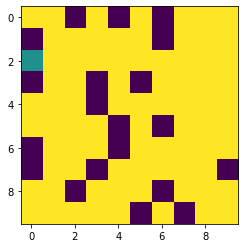

In [230]:
plt.imshow(state)

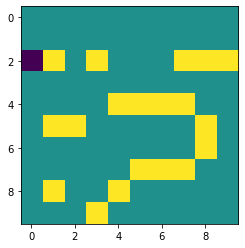

In [231]:
plt.imshow(field.state)

In [ ]:
Посмотреть глазами на ходы!!!

In [ ]:
new_state

In [220]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_16 (Reshape)         (None, 10, 10, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 1)         26        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 1)         26        
_________________________________________________________________
flatten_13 (Flatten)         (None, 100)               0         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.optimizer.lr

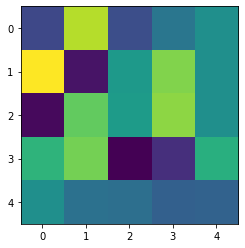

In [239]:
w = np.array(model.weights[0]).reshape(5,5)
import matplotlib.pyplot as plt
plt.imshow(w)

In [225]:
model.weights

[<tf.Variable 'conv2d_19/kernel:0' shape=(5, 5, 1, 1) dtype=float32, numpy=
 array([[[[ 1.1412542 ]],
 
         [[ 0.59471405]],
 
         [[ 0.10460269]],
 
         [[ 0.01845929]],
 
         [[ 0.25985268]]],
 
 
        [[[-1.1628706 ]],
 
         [[ 0.7590617 ]],
 
         [[-0.21115732]],
 
         [[ 0.11135232]],
 
         [[ 0.37201497]]],
 
 
        [[[ 0.6890676 ]],
 
         [[ 0.33129695]],
 
         [[ 0.5846705 ]],
 
         [[ 0.43555707]],
 
         [[-0.0834756 ]]],
 
 
        [[[ 0.15673499]],
 
         [[ 0.33880055]],
 
         [[ 0.44410288]],
 
         [[ 0.43318015]],
 
         [[ 0.22210671]]],
 
 
        [[[ 0.6843196 ]],
 
         [[ 0.49804577]],
 
         [[-0.07136286]],
 
         [[ 0.74291855]],
 
         [[ 0.5217404 ]]]], dtype=float32)>,
 <tf.Variable 'conv2d_19/bias:0' shape=(1,) dtype=float32, numpy=array([-2.9412374], dtype=float32)>,
 <tf.Variable 'conv2d_20/kernel:0' shape=(5, 5, 1, 1) dtype=float32, numpy=
 array([[[[ 1.381

In [69]:
def random_game():
    turns = 0
    field = NavalWarfare(10)
    actions = field.actions
    end_game = False
    turns = 0
    repeats = 0
    while not end_game:
        action = np.random.choice(actions)
        repeat = True
        while repeat:
            reward,end_game,repeat,state = field.move(action)
            repeats += repeat

        turns += 1
    return turns, repeats

In [33]:
for w in model.weights:
    print(np.mean(np.abs(w)))
    print(np.max(w))

0.105661914
0.23921864
0.03492979
-0.014765333
0.093247294
0.31335217
0.044609655
0.031214034


TypeError: Invalid shape (100,) for image data

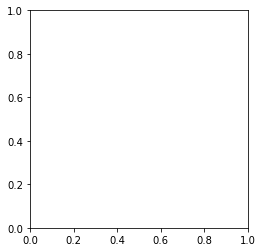

In [125]:
turns

2486

In [34]:
model.optimizer.learning_rate

<tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.001>

In [67]:
from keras.layers import Flatten

In [91]:

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 10, 10, 9)         153       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 3)         246       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 2)         26        
_________________________________________________________________
flatten_2 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
Total params: 20,525
Trainable params: 20,525
Non-trainable params: 0
_________________________________________________________________


In [112]:
weights = model.layers[0].weights

In [114]:
w = np.array(weights[0]).reshape(3,3,9)

In [115]:
import matplotlib.pyplot as plt

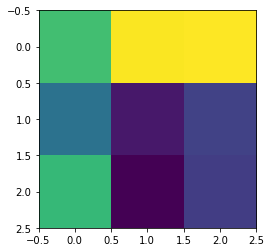

In [116]:
plt.imshow(w[:,:,2])

In [117]:
z = np.zeros((1,10,10,1))
print(model.predict(z))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [118]:
print(state)

[[-2. -2. -2.  0. -2.  0. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2.  0. -2. -2. -2.]
 [ 0. -2. -2.  0.  0.  0. -2. -2. -2. -2.]
 [-2. -2. -2. -2.  0. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2.  0. -2. -2.]
 [-2.  0. -2.  0. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2.  0.]
 [-2.  0. -2.  0. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2.  0. -2. -2. -2.]]


In [119]:
for i in tqdm(range(num_episodes)):
    field = NavalWarfare(10)
    N = field.N
    actions = field.actions
    state = field.observable
    eps *= eps_decay_factor
    end_game = False
    turns = 0
    while not end_game:
        turns += 1
        if np.random.random() < eps:
            action = np.random.choice(actions)
        else:
            action = np.argmax(
              model.predict(state.flatten().reshape(1,10,10,1)))
        r,end_game,repeat,new_state = field.move(action)
        reward = r - 5
        target = (reward + 
          discount_factor * 
            np.max(
              model.predict(state.flatten().reshape(1,10,10,1))))
        target_vector = model.predict(
         state.flatten().reshape(1,10,10,1))[0]
        target_vector[action] = target
        model.fit(
          x=state.flatten().reshape(1,10,10,1), 
          y=target_vector.reshape(1,-1), 
          epochs=1, verbose=0)
        state = new_state
    print(turns)

  0%|▏                                                                               | 1/500 [00:55<7:39:12, 55.21s/it]

322


  0%|▎                                                                               | 2/500 [02:01<8:06:26, 58.61s/it]

392


  1%|▍                                                                              | 3/500 [03:50<10:10:05, 73.65s/it]

626


  1%|▌                                                                             | 4/500 [06:34<13:53:02, 100.77s/it]

889


  1%|▊                                                                             | 5/500 [12:27<24:15:33, 176.43s/it]

2159


  1%|▉                                                                             | 6/500 [16:14<26:18:29, 191.72s/it]

1417


  1%|█                                                                             | 7/500 [20:31<28:55:13, 211.18s/it]

1595


  2%|█▏                                                                            | 8/500 [25:45<33:05:06, 242.09s/it]

1676


  2%|█▍                                                                            | 9/500 [30:32<34:50:00, 255.40s/it]

1785


  2%|█▌                                                                           | 10/500 [36:57<40:03:50, 294.35s/it]

2421


  2%|█▋                                                                           | 11/500 [44:01<45:15:21, 333.17s/it]

2698


  2%|█▊                                                                           | 12/500 [48:17<42:03:31, 310.27s/it]

1630


  3%|██                                                                           | 13/500 [53:59<43:14:51, 319.70s/it]

2094


  3%|██▏                                                                          | 14/500 [59:40<44:01:50, 326.15s/it]

2111


  3%|██▎                                                                        | 15/500 [1:07:37<50:01:10, 371.28s/it]

3005


  3%|██▍                                                                        | 16/500 [1:10:04<40:52:34, 304.04s/it]

940


  3%|██▌                                                                        | 17/500 [1:17:57<47:35:33, 354.73s/it]

3084


  4%|██▋                                                                        | 18/500 [1:29:03<60:00:32, 448.20s/it]

4395


  4%|██▊                                                                        | 19/500 [1:33:45<53:12:29, 398.23s/it]

1859


  4%|███                                                                        | 20/500 [1:45:25<65:10:27, 488.81s/it]

4486


  4%|███▏                                                                       | 21/500 [1:49:50<56:06:59, 421.75s/it]

1464


  4%|███▎                                                                       | 22/500 [1:55:49<53:29:44, 402.90s/it]

2064


  5%|███▍                                                                       | 23/500 [2:01:19<50:28:52, 380.99s/it]

1932


  5%|███▌                                                                       | 24/500 [2:16:55<72:21:47, 547.29s/it]

5583


  5%|███▊                                                                       | 25/500 [2:22:45<64:25:18, 488.25s/it]

2103


  5%|███▉                                                                       | 26/500 [2:25:57<52:34:38, 399.32s/it]

1148


  5%|████                                                                       | 27/500 [2:30:28<47:25:06, 360.90s/it]

1555


  6%|████▏                                                                      | 28/500 [2:37:16<49:10:45, 375.10s/it]

2329


  6%|████▎                                                                      | 29/500 [2:43:09<48:10:28, 368.21s/it]

2030


  6%|████▎                                                                      | 29/500 [2:43:49<44:20:50, 338.96s/it]


KeyboardInterrupt: 

In [4]:
def random_game():
    turns = 0
    field = NavalWarfare(10)
    state = np.zeros((10,10))
    actions = field.actions
    end_game = False
    turns = 0
    states = []
    observations = []
    decisions = []
    rewards = []
    while not end_game:
        observations.append(np.copy(state))
        states.append(np.copy(field.state))
        action = np.random.choice(actions)
        reward,end_game,repeat,state = field.move(action)
        decisions.append(action)
        rewards.append(reward )
        turns += 1
    states.append(np.copy(field.state))
    observations.append(np.copy(state))
    return turns, states, observations, decisions, rewards

In [42]:
def get_model(learning_rate = 1):
    model = Sequential()
    model.add(Conv2D(filters=9,kernel_size = (5,5),strides=(1,1), padding='same', activation='relu', input_shape=(10, 10, 1)))
    model.add(Conv2D(filters=3,kernel_size = (3,3),strides=(1,1), padding='same', activation='relu', input_shape=(10, 10, 1)))
    model.add(Conv2D(filters=2,kernel_size = (2,2),strides=(1,1), padding='same', activation='relu', input_shape=(10, 10, 1)))
    model.add(Flatten())
    model.add(Dense(100, activation='linear')) 
    opt = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=opt, metrics=['mae'])
    return model

In [49]:
def fit_on_batch_of_matches(model,matches,epochs=10):
    X = []
    y = []
    for match in tqdm(matches):
        turns,states,observations,decisions,rewards = match
        for i in range(turns-1):
            Q = model.predict(observations[i].flatten().reshape(1,10,10,1))
            q = Q[0,decisions[i]]
            reward = rewards[i] - 5
            Q_new = np.max(model.predict(observations[i+1].flatten().reshape(1,10,10,1)))
            target = (reward + 
                      discount_factor * 
                        (q -  np.max(Q_new)))
            Q[0,decisions[i]] = target
            X.append(observations[i])
            y.append(Q)
        X.append(observations[-1])
        y.append(np.ones_like(Q)*(-5))
    X = np.array(X).reshape(-1,10,10,1)
    y = np.array(y)
    model.fit(X,y,epochs=epochs)
    return model,X,y

In [61]:
def fit_on_match(model,turns,states,observations,decisions,rewards):
    X = []
    y = []
    for i in range(turns-1):
        Q = model.predict(observations[i].flatten().reshape(1,10,10,1))
        q = Q[0,decisions[i]]
        reward = rewards[i] - 5
        Q_new = np.max(model.predict(observations[i+1].flatten().reshape(1,10,10,1)))
        target = (reward + 
              discount_factor * 
                (q -  np.max(Q_new)))
        Q[0,decisions[i]] = target
        X.append(observations[i])
        y.append(Q)
    X.append(observations[-1])
    y.append(np.ones_like(Q)*(-5))
    X = np.array(X).reshape(-1,10,10,1)
    y = np.array(y)
    y.reshape(-1,100)
    print(X.shape,y.shape)
    model.fit(X,y)
    return model

def train(model,matches,epochs=5):
    for epoch in range(epochs):
        for turns,states,observations,decisions,rewards in matches:
            model = fit_on_match(model,turns,states,observations,decisions,rewards)
        print(f'epoch {epoch}')
        play_game(model)
    

def train_2(model,matches,epochs=10):
        model,X,y = fit_on_batch_of_matches(model,matches,epochs)
        play_game(model)
        return X,y

def play_game(model, max_turns=100):
        turns = 0
        field = NavalWarfare(10)
        end_game = False
        turns = 0
        state = np.zeros((10,10))
        while not end_game and turns < max_turns:
            turns += 1
            S = (np.sum(field.state) + 20 ) // 2
            sunken = 20 - S
            tested_fields = np.sum(state < 0)
    #             print(np.sum(field.state))
    #             print(np.sum(state))
            Q = model.predict(state.flatten().reshape(1,10,10,1))
            action = np.argmax(Q)
            reward,end_game,repeat,state = field.move(action)
        print(f'turns : {turns}')
        print(f'sunken ships: {sunken}')
        print(f'ships left: {S}')
        print(f'fields tested: {tested_fields}')

In [62]:
from tqdm import tqdm

In [63]:
matches = []
for i in tqdm(range(40)):
    turns,states,observations,decisions,rewards = random_game()
    matches.append((turns,states,observations,decisions,rewards))
print('train games generated')
model = get_model(learning_rate=2)
X,y = train_2(model,matches)

  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

train games generated


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [22:17<00:00, 33.43s/it]


Epoch 1/10
451/451 [==============================] - 2s 5ms/step - loss: 6.9062 - mae: 1.7195
Epoch 2/10
451/451 [==============================] - 2s 4ms/step - loss: 6.3326 - mae: 1.6384
Epoch 3/10
451/451 [==============================] - 2s 4ms/step - loss: 6.2934 - mae: 1.6356
Epoch 4/10
451/451 [==============================] - 2s 4ms/step - loss: 6.2705 - mae: 1.6250
Epoch 5/10
451/451 [==============================] - 2s 4ms/step - loss: 6.3606 - mae: 1.6465
Epoch 6/10
451/451 [==============================] - 2s 4ms/step - loss: 6.3401 - mae: 1.6396
Epoch 7/10
451/451 [==============================] - 2s 4ms/step - loss: 6.3060 - mae: 1.6345
Epoch 8/10
451/451 [==============================] - 2s 4ms/step - loss: 6.3206 - mae: 1.6378
Epoch 9/10
451/451 [==============================] - 2s 4ms/step - loss: 6.2953 - mae: 1.6320
Epoch 10/10
451/451 [==============================] - 2s 4ms/step - loss: 6.3134 - mae: 1.6380
turns : 100
sunken ships: 0.0
ships left: 20.0
fi

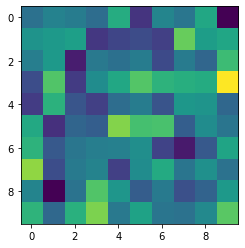

In [59]:
plt.imshow(model.predict(np.zeros((1,10,10,1))).reshape(10,10))

In [29]:
play_game(model)

turns : 100
sunken ships: 0.0
ships left: 20.0
fields tested: 1


In [166]:
rewards[2]

0

In [30]:
model.weights[0].shape

TensorShape([5, 5, 1, 9])

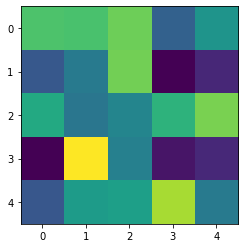

In [41]:
plt.imshow(model.weights[0][:,:,0,8])

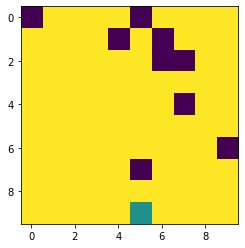

In [58]:
plt.imshow(observations[10])

In [128]:
play_game(model)

turns : 100
sunken ships: 0.0
ships left: 20.0
fields tested: 2


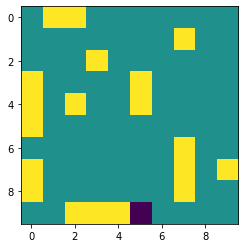

In [59]:
plt.imshow(states[10])

In [76]:
np.mean(turns), np.mean(repeats)

(358.291, 19.0)

In [70]:
field.observable

array([[-2., -2., -2.,  0., -2.,  0., -2., -2., -2., -2.],
       [-2., -2., -2., -2., -2., -2.,  0., -2., -2., -2.],
       [ 0., -2., -2.,  0.,  0.,  0., -2., -2., -2., -2.],
       [-2., -2., -2., -2.,  0., -2., -2., -2., -2., -2.],
       [-2., -2., -2., -2., -2., -2., -2.,  0., -2., -2.],
       [-2.,  0., -2.,  0., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -2., -2., -2., -2., -2., -2., -2.,  0.],
       [-2.,  0., -2.,  0., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -2., -2., -2., -2.,  0., -2., -2., -2.]])